In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pprint import pprint

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
churn=pd.read_csv("/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv")
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [8]:
dropCol = ['Customer ID','Latitude','Longitude','Churn Reason','Churn Category']
churn.drop(dropCol ,axis = 1, inplace = True) #dropping columns which are not needed

In [9]:
churn.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [10]:
churn.shape

(7043, 33)

In [11]:
churn.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                          

In [12]:
churn.isnull().T.any().T.sum()

2208

In [13]:
churn = churn.dropna()

In [14]:
churn.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method           

In [15]:
#churn['Married'] = churn['Married'].map(lambda x: x.lower() == 'yes')
#churn['Phone Service'] = churn['Phone Service'].map(lambda x: x.lower() == 'yes')
#churn['Multiple Lines'] = churn['Multiple Lines'].map(lambda x: x.lower() == 'yes')
#churn['Internet Service'] = churn['Internet Service'].map(lambda x: x.lower() == 'yes')
#churn['Online Security'] = churn['Online Security'].map(lambda x: x.lower() == 'yes')
#churn['Online Backup'] = churn['Online Backup'].map(lambda x: x.lower() == 'yes')
#churn['Device Protection Plan'] = churn['Device Protection Plan'].map(lambda x: x.lower() == 'yes')




In [16]:
churn = churn.replace('Yes',1)
churn = churn.replace('No',0)

In [17]:
churn.head(3)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,1,0,Frazier Park,93225,2,9,None,1,42.39,0,1,Cable,16.0,0,1,0,1,1,0,0,1,One Year,1,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,0,0,Glendale,91206,0,9,None,1,10.69,1,1,Cable,10.0,0,0,0,0,0,1,1,0,Month-to-Month,0,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,0,0,Costa Mesa,92627,0,4,Offer E,1,33.65,0,1,Fiber Optic,30.0,0,0,1,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned


In [18]:
cat_list = ['Gender','City','Offer','Internet Type','Contract','Payment Method']

In [19]:
encoder = LabelEncoder()
churn[cat_list]=churn[cat_list].apply(lambda churn:encoder.fit_transform(churn))

In [76]:
churn.head(3)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,340,93225,2,9,0,1,42.39,0,1,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,1,46,0,0,362,91206,0,9,0,1,10.69,1,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,1,50,0,0,217,92627,0,4,5,1,33.65,0,1,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,Churned


In [85]:
df = churn['Customer Status'].unique()
df

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [89]:
churn['Customer Status'].value_counts()

Stayed     3015
Churned    1586
Joined      234
Name: Customer Status, dtype: int64

In [21]:
X = churn.drop('Customer Status',axis =1)
y = churn['Customer Status']

In [22]:
X.head(3)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,37,1,0,340,93225,2,9,0,1,42.39,0,1,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81
1,1,46,0,0,362,91206,0,9,0,1,10.69,1,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28
2,1,50,0,0,217,92627,0,4,5,1,33.65,0,1,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45


In [23]:
y.unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [24]:
y.head()

0     Stayed
1     Stayed
2    Churned
3    Churned
4    Churned
Name: Customer Status, dtype: object

In [25]:
def mapValues(value):
    if value == 'Stayed':
        return 0
    elif value == 'Churned':
        return 1
    elif value == 'Joined':
        return 2
    

y = y.map(lambda x: mapValues(x))


In [26]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: Customer Status, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [29]:
#rf = RandomForestClassifier()
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [30]:
#rf_random.best_params_

------------

# Creating best model using the parameters from grid search
# best parameters found from the gridcv search are as follows
{'n_estimators': 644,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': False}

In [31]:
rf = RandomForestClassifier(n_estimators = 644,
                            min_samples_split = 5,
                            min_samples_leaf = 1,
                            max_depth = 50,
                            bootstrap = False
                           )

                            
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=644)

In [32]:
prediction = rf.predict(X_test)

In [33]:
rf.score(X_test, y_test)

0.8210961737331954

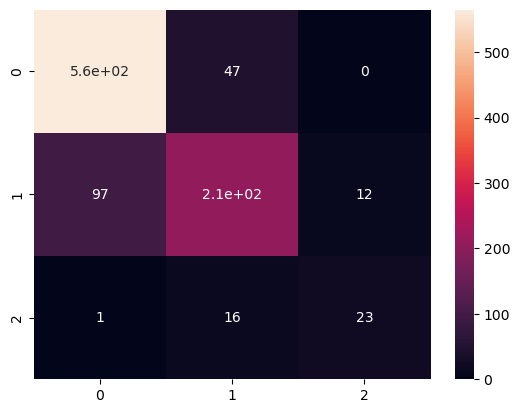

In [34]:
#getting confusion matrix
CM = confusion_matrix(y_test, prediction)
seaborn.heatmap(CM,annot=True)
plt.show()

In [35]:

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       612
           1       0.77      0.65      0.71       315
           2       0.66      0.57      0.61        40

    accuracy                           0.82       967
   macro avg       0.76      0.72      0.74       967
weighted avg       0.82      0.82      0.82       967



---
# model 2 : neural network

In [36]:

from keras.utils import np_utils


In [37]:
X.head(5)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,37,1,0,340,93225,2,9,0,1,42.39,0,1,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81
1,1,46,0,0,362,91206,0,9,0,1,10.69,1,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28
2,1,50,0,0,217,92627,0,4,5,1,33.65,0,1,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45
3,1,78,1,0,578,94553,1,13,4,1,27.82,0,1,2,4.0,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51
4,0,75,1,0,136,93010,3,3,0,1,7.38,0,1,2,11.0,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54


In [38]:
X.shape

(4835, 32)

In [39]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: Customer Status, dtype: int64

In [40]:
y = np.array(y)

In [41]:
y

array([0, 0, 1, ..., 1, 2, 0])

In [42]:
Y = np_utils.to_categorical(y,3)


In [43]:
Y[0]

array([1., 0., 0.], dtype=float32)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)


In [62]:
model = Sequential(layers=[
    Dense(1024, activation="relu", input_shape=(32,)),
    BatchNormalization(),
    
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1024, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1024, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(3, activation="softmax")
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              33792     
                                                                 
 batch_normalization_33 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_34 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 1024)             

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [66]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size=16, 
    validation_data=(X_test, y_test), 
    verbose=1,
    #callbacks=[checkpointer, earlystopping],
    shuffle=True,
    epochs=100
)

Epoch 1/100
242/242 [==============================] - 3s 11ms/step - loss: 0.5033 - accuracy: 0.6815 - val_loss: 0.4324 - val_accuracy: 0.7166
Epoch 2/100
242/242 [==============================] - 3s 10ms/step - loss: 0.4911 - accuracy: 0.6877 - val_loss: 0.4184 - val_accuracy: 0.7342
Epoch 3/100
242/242 [==============================] - 3s 11ms/step - loss: 0.4955 - accuracy: 0.6936 - val_loss: 0.4239 - val_accuracy: 0.7291
Epoch 4/100
242/242 [==============================] - 3s 10ms/step - loss: 0.4870 - accuracy: 0.6890 - val_loss: 0.4212 - val_accuracy: 0.7301
Epoch 5/100
242/242 [==============================] - 3s 13ms/step - loss: 0.4877 - accuracy: 0.7001 - val_loss: 0.4211 - val_accuracy: 0.7384
Epoch 6/100
242/242 [==============================] - 3s 11ms/step - loss: 0.4835 - accuracy: 0.6926 - val_loss: 0.4337 - val_accuracy: 0.7166
Epoch 7/100
242/242 [==============================] - 3s 10ms/step - loss: 0.4765 - accuracy: 0.7055 - val_loss: 0.4184 - val_accuracy:

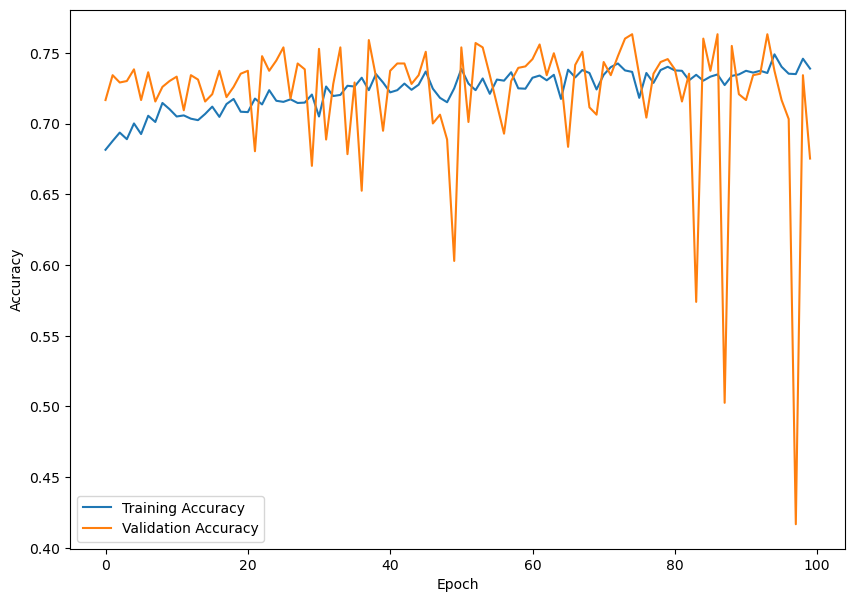

In [74]:
training_acc = history.history["accuracy"]
training_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
plt.figure(figsize=(10, 7))
plt.plot(history.epoch, training_acc, label="Training Accuracy")
plt.plot(history.epoch, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
 prediction = model.predict(X_test)

31/31 [==============================] - 0s 2ms/step


------
# ****model 3: SVM

In [90]:
from sklearn.svm import SVC

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [94]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [97]:
prediction=svc.predict(X_test)
print('model accuracy with default parameters',accuracy_score(y_test,prediction))

model accuracy with default parameters 0.6328852119958635


# finding best parameters for SVC


In [102]:
from sklearn.model_selection import GridSearchCV

In [98]:
svc=SVC()

In [100]:
#hyper parameters
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
             ]

In [ ]:
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [ ]:
rid_search.best_score_